In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def image_show(image, trans_model=None, location=None, show=None):
    if location is not None:
        plt.subplot(location)
    if trans_model is not None:
        image = cv2.cvtColor(image, trans_model)
    plt.imshow(image)
    if location is None or show:
        plt.show()

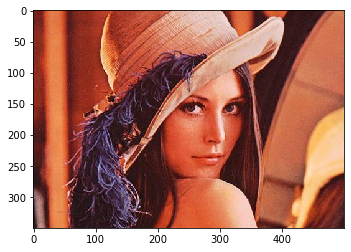

In [3]:
lenna_bgr = cv2.imread('lenna.jpg')
lenna = cv2.cvtColor(lenna_bgr, cv2.COLOR_BGR2RGB)
image_show(lenna)

# 裁剪

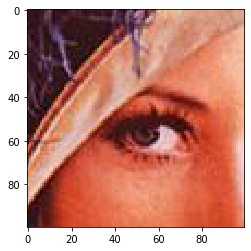

In [4]:
cut = lenna[100:200,200:300]
image_show(cut)

#  图片的格式
可以看到，图片是一个维的矩阵。

先抛开第三维不谈，其中的二维就是我们图片的信息，而其中的二维的每个元素，就是每个像素点。<br>
也就是说，这个二维列表表达的就是图片的空间信息，或者说是点之间的空间关系。<br>
因此，我们对图片的二维直接进行切片，就能够完成图片的切割。

而第三维，也正是之前花了很大精力讲述的颜色信息。<br>
不论每种的颜色编码，采用的都是三通道模式，前面的例子至少已经表达出来了。<br>
`cv`的`split`和`merge`，估计也算很熟练了，不过颜色真的很诡异就是了。<br>


In [5]:
lenna

array([[[114,  35,  28],
        [118,  39,  32],
        [121,  42,  35],
        ...,
        [211, 123,  87],
        [212, 124,  88],
        [213, 125,  89]],

       [[112,  33,  26],
        [114,  35,  28],
        [117,  38,  31],
        ...,
        [212, 124,  88],
        [212, 124,  88],
        [212, 124,  88]],

       [[116,  37,  30],
        [117,  38,  31],
        [119,  40,  33],
        ...,
        [210, 125,  88],
        [210, 125,  88],
        [210, 125,  88]],

       ...,

       [[ 42,  24,  22],
        [ 44,  26,  24],
        [ 50,  30,  31],
        ...,
        [ 48,  18,  20],
        [ 48,  18,  20],
        [ 48,  18,  20]],

       [[ 38,  20,  18],
        [ 42,  24,  22],
        [ 49,  29,  30],
        ...,
        [ 52,  22,  24],
        [ 54,  24,  26],
        [ 56,  26,  28]],

       [[ 36,  18,  16],
        [ 41,  23,  21],
        [ 48,  28,  29],
        ...,
        [ 54,  24,  26],
        [ 58,  28,  30],
        [ 63,  33,  35]]

#  翻转
| code | description|
| ---  | ---        |
| 0    |    垂直翻转     |
| 1    |          水平翻转  |
|-1    |    先x后y        |

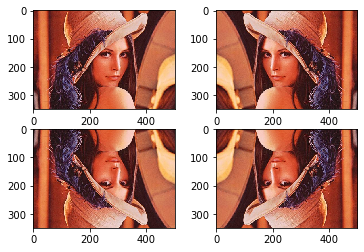

In [6]:
image_show(lenna, location=221, show=False)
image_show(cv2.flip(lenna, 1), location=222, show=False)
image_show(cv2.flip(lenna, 0), location=223, show=False)
image_show(cv2.flip(lenna, -1), location=224, show=True)

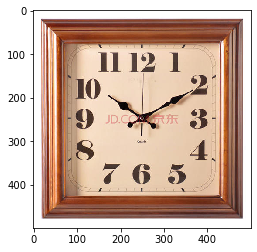

In [7]:
clock = cv2.cvtColor(cv2.imread('clock.jpg'), cv2.COLOR_BGR2RGB)
image_show(clock)

In [8]:
def apply(arr, size=None):
    M = np.float32(arr)
    if size is None:
        size = clock.shape[:2]
    m_img = cv2.warpAffine(clock, M, size)
    image_show(m_img) 

# 空间变换
## 平移
首先，把自己吹的牛逼给写出来，在前面说的时候，平移是这样的


$$
\left[
\begin{matrix}
x \\ y \\ b
\end{matrix}
\right]
 = \left[
 \begin{matrix}
 1 & 0 & \hat x \\
 0 & 1 & \hat y
 \end{matrix}
 \right]\left[
 \begin{matrix}
 x_0 \\ y_0 \\1
 \end{matrix}
 \right]
$$


所以往左移动50像素，往上移动80像素应该是


$$
M = 
\left[
 \begin{matrix}
    1 & 0 & -50 \\
    0 & 1 & -80
 \end{matrix}
 \right]
$$


因为坐标轴的增大方向是这样的
- $X$ : 从左到右
- $Y$ : 从上到下

In [9]:
def move_matrix(left, down):
    return [[1, 0, -50],[0, 1, -80]]

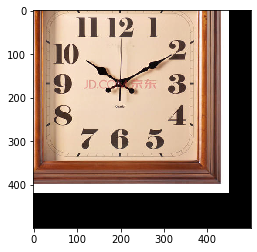

In [10]:
apply(move_matrix(-50, -80))

# 伸缩
x缩小一半，y增大一倍
$$
M = \left[
\begin{matrix}
0.5& 0& 0 \\
0 & 2 & 0
\end{matrix}
\right]
$$

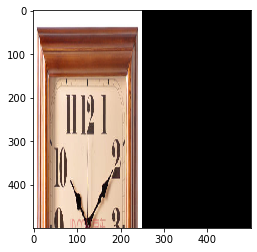

In [11]:
apply([[0.5,0,0],[0,2,0]])
# 可以看到
# x的确只剩下一半了
# y的话太长，容不下，中心黑点了

#  旋转
我们之前的旋转矩阵是这样的<br>
$$
M =  \left[ \begin{matrix} \cos a & -\sin a & \hat x\\ \sin a & \cos a & \hat y \end{matrix} \right]
$$
我们先不进行平移，得到这样的矩阵
$$
M =  \left[ \begin{matrix} \cos a & -\sin a & 0\\ \sin a & \cos a &0 \end{matrix} \right]
$$

In [12]:
import math

def rotate_matrix(angle,right=0, up=0):
    _angle =math.pi * angle / 180
    _cos = math.cos(_angle)
    _sin = math.sin(_angle)
    return [[_cos, -_sin, right],[_sin, _cos, up]]

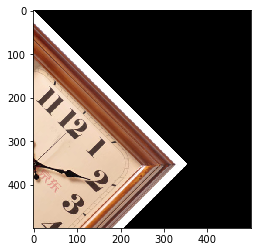

In [13]:
mat = rotate_matrix(45)
apply(mat)

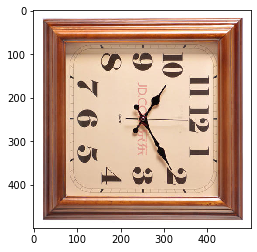

In [14]:
apply(rotate_matrix(90, right=500))

# 仿射
仿射的话，由于全部的参数都是任意的，相互之间不关联，具体效果的话最好以点来规定。

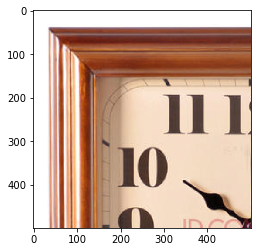

In [15]:
pt1 = np.float32([[0,1],[1,1],[1,0]])
pt2 = np.float32([[0,2],[2,2],[2,0]])
M = cv2.getAffineTransform(pt1, pt2)
apply(M)
# 和我们理解的一样，只是这个X和Y都放大了两倍[[2,0,0],[0,2,0]]
# 我们上面的x缩小为了一半[[0,5,0,0],[0,2,0]]

# 投影
关于投影没说什么，自己异想天开即可

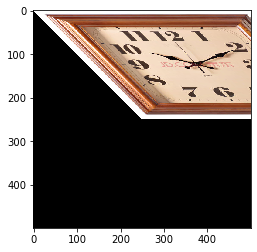

In [16]:
pt3 = np.float32([[0,0],[0,2],[2,2],[2,0]])
# pt4 = np.float32([[2,0],[2,2],[0,2],[0,0]])
# 镜像翻另一面去了，不好搞，翻角度小一点的
# 或者后面自己通过平移恢复
pt4 = np.float32([[0,0],[1,1],[3,1],[2,0]])
mirror_matrix = cv2.getPerspectiveTransform(pt3, pt4)
mirror_clock = cv2.warpPerspective(clock, mirror_matrix, clock.shape[:2])
image_show(mirror_clock)